In [38]:
import pandas as pd
import string

In [39]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

# Read Data

In [40]:
data_file = "./emissions_and_revenue_20211024_20211031.csv"

In [41]:
data = pd.read_csv(data_file, parse_dates=[0], index_col=0)
data

,timestamp,block_number,pool_name,pool_addr,lp_token_addr,gauge_addr,gauge_relative_weight,lp_token_virtual_price,total_supply_lp_token,crv_minted_past_1d,crv_to_gauge,virtual_price_diff,swap_fee_revenue,swap_revenue_to_crv_emissions_ratio
2021-08-01 22:00:00,1627855200,12942173,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.030036,1.018272,1.390232e+09,752918.583562,22614.480396,2.357735e-05,65555.967017,2.898849
2021-08-02 22:00:00,1627941600,12948490,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.030036,1.018283,1.424801e+09,752918.583562,22614.480396,1.118013e-05,31858.925554,1.408784
2021-08-03 22:00:00,1628028000,12954859,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.030036,1.018316,1.463633e+09,752918.583562,22614.480396,3.220691e-05,94278.182205,4.168930
2021-08-04 22:00:00,1628114400,12961207,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.030036,1.018327,1.445770e+09,752918.583562,22614.480396,1.142734e-05,33042.594493,1.461126
2021-08-05 22:00:00,1628200800,12967525,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.025019,1.018337,1.439797e+09,752918.583562,18837.080794,1.027796e-05,29596.347784,1.571175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27 22:00:00,1635372000,13501909,Curve.fi Factory Plain Pool: Euro Tether,0xFD5dB7463a3aB53fD211b4af195c5BCCC1A03890,0xFD5dB7463a3aB53fD211b4af195c5BCCC1A03890,0xe8060Ad8971450E624d5289A10017dD30F5dA85F,0.000369,1.001567,1.508228e+07,633126.537895,233.338887,8.179796e-05,2467.399274,10.574317
2021-10-28 22:00:00,1635458400,13508257,Curve.fi Factory Plain Pool: Euro Tether,0xFD5dB7463a3aB53fD211b4af195c5BCCC1A03890,0xFD5dB7463a3aB53fD211b4af195c5BCCC1A03890,0xe8060Ad8971450E624d5289A10017dD30F5dA85F,0.000369,1.001568,1.502148e+07,633126.537895,233.639447,3.288962e-07,9.881013,0.042292
2021-10-29 22:00:00,1635544800,13514645,Curve.fi Factory Plain Pool: Euro Tether,0xFD5dB7463a3aB53fD211b4af195c5BCCC1A03890,0xFD5dB7463a3aB53fD211b4af195c5BCCC1A03890,0xe8060Ad8971450E624d5289A10017dD30F5dA85F,0.000369,1.001591,1.479633e+07,633126.537895,233.639447,2.303976e-05,681.807590,2.918204
2021-10-30 22:00:00,1635631200,13520996,Curve.fi Factory Plain Pool: Euro Tether,0xFD5dB7463a3aB53fD211b4af195c5BCCC1A03890,0xFD5dB7463a3aB53fD211b4af195c5BCCC1A03890,0xe8060Ad8971450E624d5289A10017dD30F5dA85F,0.000369,1.001591,1.479633e+07,633126.537895,233.639447,0.000000e+00,0.000000,0.000000


# Plots

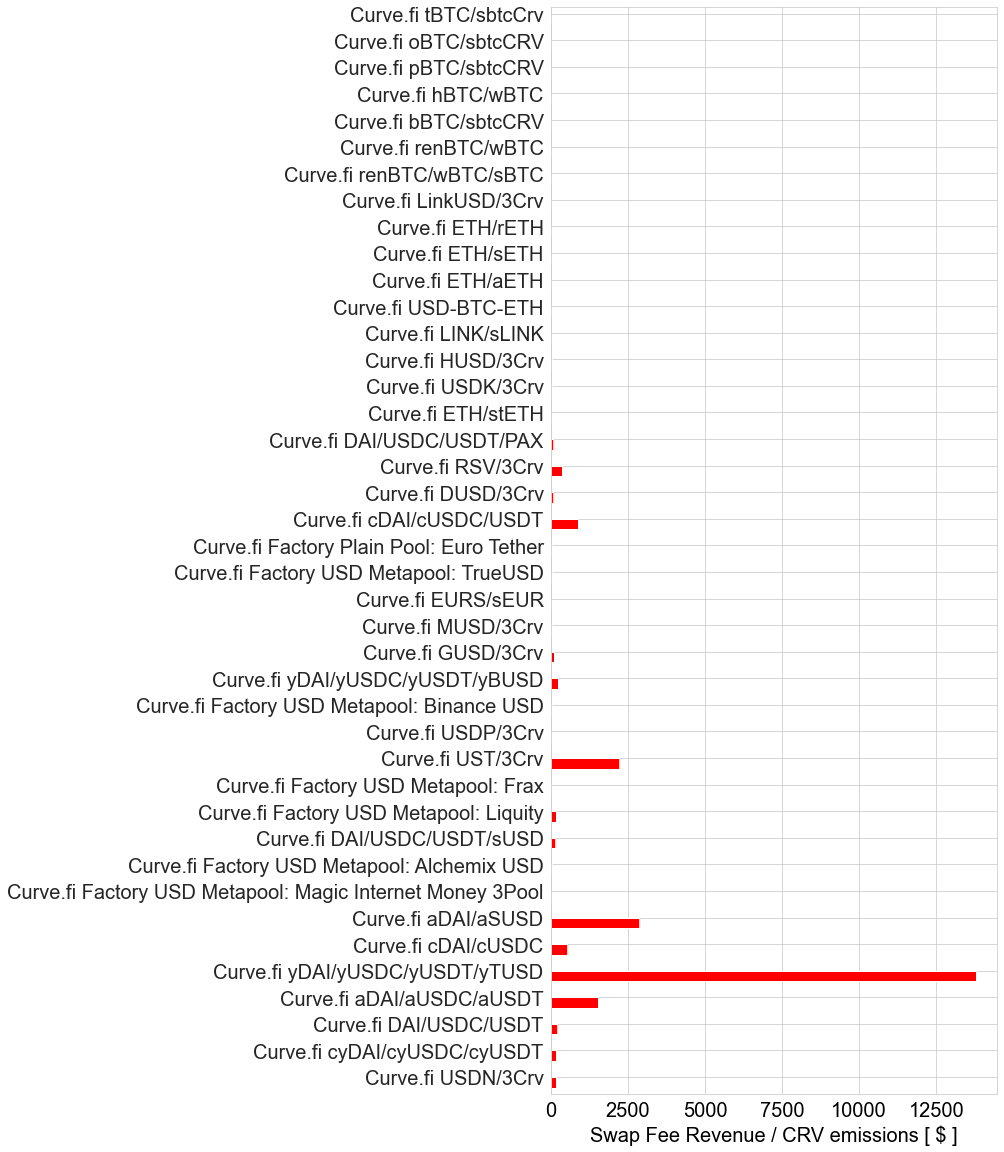

In [42]:
df_plot = data.groupby('pool_name').sum().sort_values(
    by='swap_fee_revenue',
    ascending=False
)

fig, ax = plt.subplots(1,1, figsize=(8, 20))

df_plot[["swap_revenue_to_crv_emissions_ratio"]].plot.barh(
    ax=ax,
    color='red',
    width=0.4,
    position=1,
    align='center'
)
ax.set_ylabel("", fontsize=20)
ax.set_xlabel("Swap Fee Revenue / CRV emissions [ $ ]", fontsize=20, color='black')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.get_legend().remove();

Interesting stuff: what's happening here? Tricrypto is barely visible! hmm

In [43]:
tricrypto_pool_addr = "0xD51a44d3FaE010294C616388b506AcdA1bfAAE46"
tricrypto_data = data[data.pool_addr=="0xD51a44d3FaE010294C616388b506AcdA1bfAAE46"]
tricrypto_data

,timestamp,block_number,pool_name,pool_addr,lp_token_addr,gauge_addr,gauge_relative_weight,lp_token_virtual_price,total_supply_lp_token,crv_minted_past_1d,crv_to_gauge,virtual_price_diff,swap_fee_revenue,swap_revenue_to_crv_emissions_ratio
2021-08-01 22:00:00,1627855200,12942173,Curve.fi USD-BTC-ETH,0xD51a44d3FaE010294C616388b506AcdA1bfAAE46,0xc4AD29ba4B3c580e6D59105FFf484999997675Ff,0xDeFd8FdD20e0f34115C7018CCfb655796F6B2168,0.000000,1.001591,26172.574781,752918.583562,0.000000,0.000005,0.264015,inf
2021-08-02 22:00:00,1627941600,12948490,Curve.fi USD-BTC-ETH,0xD51a44d3FaE010294C616388b506AcdA1bfAAE46,0xc4AD29ba4B3c580e6D59105FFf484999997675Ff,0xDeFd8FdD20e0f34115C7018CCfb655796F6B2168,0.000000,1.001668,27976.568949,752918.583562,0.000000,0.000077,4.331430,inf
2021-08-03 22:00:00,1628028000,12954859,Curve.fi USD-BTC-ETH,0xD51a44d3FaE010294C616388b506AcdA1bfAAE46,0xc4AD29ba4B3c580e6D59105FFf484999997675Ff,0xDeFd8FdD20e0f34115C7018CCfb655796F6B2168,0.000000,1.001756,29193.431110,752918.583562,0.000000,0.000088,5.132304,inf
2021-08-04 22:00:00,1628114400,12961207,Curve.fi USD-BTC-ETH,0xD51a44d3FaE010294C616388b506AcdA1bfAAE46,0xc4AD29ba4B3c580e6D59105FFf484999997675Ff,0xDeFd8FdD20e0f34115C7018CCfb655796F6B2168,0.000000,1.001796,35498.178224,752918.583562,0.000000,0.000040,2.843369,inf
2021-08-05 22:00:00,1628200800,12967525,Curve.fi USD-BTC-ETH,0xD51a44d3FaE010294C616388b506AcdA1bfAAE46,0xc4AD29ba4B3c580e6D59105FFf484999997675Ff,0xDeFd8FdD20e0f34115C7018CCfb655796F6B2168,0.131814,1.001903,74896.292267,752918.583562,99245.090976,0.000107,16.071694,0.000162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27 22:00:00,1635372000,13501909,Curve.fi USD-BTC-ETH,0xD51a44d3FaE010294C616388b506AcdA1bfAAE46,0xc4AD29ba4B3c580e6D59105FFf484999997675Ff,0xDeFd8FdD20e0f34115C7018CCfb655796F6B2168,0.078314,1.005437,444459.863549,633126.537895,49582.849605,0.000050,44.164259,0.000891
2021-10-28 22:00:00,1635458400,13508257,Curve.fi USD-BTC-ETH,0xD51a44d3FaE010294C616388b506AcdA1bfAAE46,0xc4AD29ba4B3c580e6D59105FFf484999997675Ff,0xDeFd8FdD20e0f34115C7018CCfb655796F6B2168,0.078399,1.005461,473878.803821,633126.537895,49636.505938,0.000024,22.447584,0.000452
2021-10-29 22:00:00,1635544800,13514645,Curve.fi USD-BTC-ETH,0xD51a44d3FaE010294C616388b506AcdA1bfAAE46,0xc4AD29ba4B3c580e6D59105FFf484999997675Ff,0xDeFd8FdD20e0f34115C7018CCfb655796F6B2168,0.078399,1.005476,474820.967607,633126.537895,49636.505938,0.000016,14.969926,0.000302
2021-10-30 22:00:00,1635631200,13520996,Curve.fi USD-BTC-ETH,0xD51a44d3FaE010294C616388b506AcdA1bfAAE46,0xc4AD29ba4B3c580e6D59105FFf484999997675Ff,0xDeFd8FdD20e0f34115C7018CCfb655796F6B2168,0.078399,1.005487,511601.969592,633126.537895,49636.505938,0.000011,10.948244,0.000221


In [46]:
def plot_lineplot(df: pd.DataFrame, column: str):

    fig, ax = plt.subplots(1,1, figsize=(20, 8))

    ax.plot(
        df.index,
        df[column],
        color='black',
        lw=5,
        label=df.pool_name.unique()[0]
    )
    ax.set_ylabel(string.capwords(column.replace("_", " ")), fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', colors='black')
    ax.legend(fontsize=20)

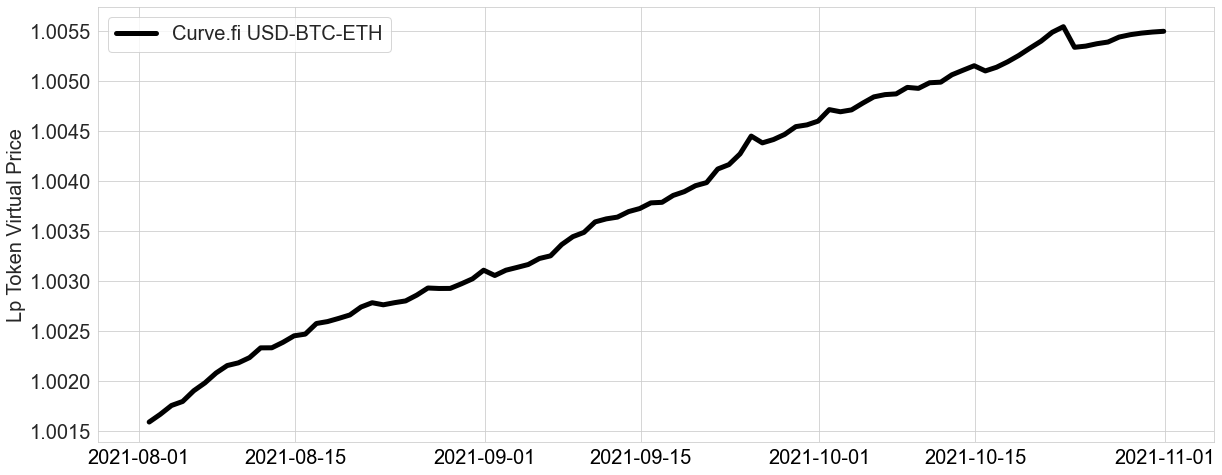

In [47]:
plot_lineplot(tricrypto_data, column='lp_token_virtual_price')

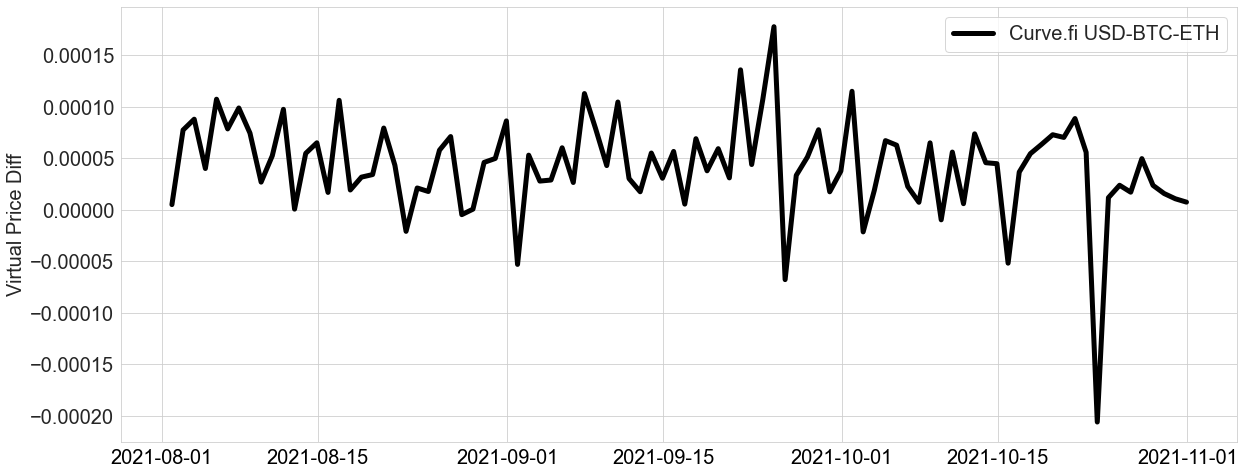

In [48]:
plot_lineplot(tricrypto_data, column='virtual_price_diff')

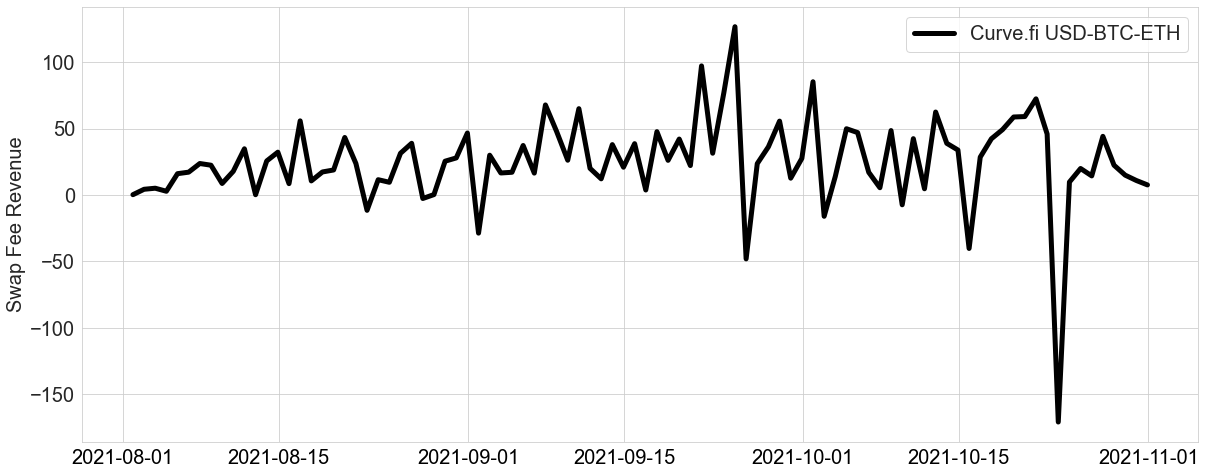

In [49]:
plot_lineplot(tricrypto_data, column='swap_fee_revenue')